In [1]:
import numpy as np
import matplotlib.pyplot as plt

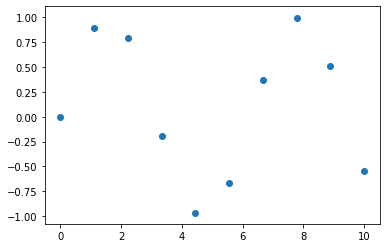

In [2]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [3]:
from scipy.interpolate import interp1d

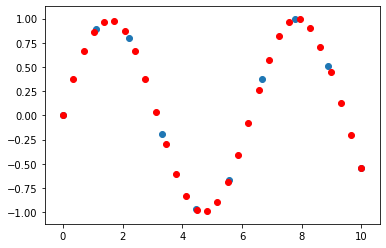

In [4]:
f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 30)
result = f(new_x)
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

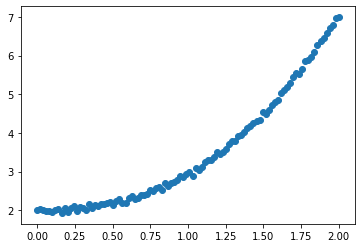

In [5]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 + 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [6]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [7]:
from scipy import optimize

In [8]:
params, param_curve = optimize.curve_fit(f, x, y)
params[3]

1.9981671876333267

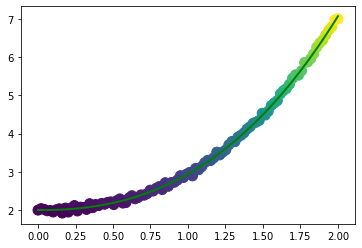

In [9]:
plt.scatter(x, y, c=y, s=100)
plt.plot(x, f(x,params[0], params[1], params[2], params[3]), c='g', lw=2)

In [10]:
def f(x):
    return x**2 + 15*np.sin(x)

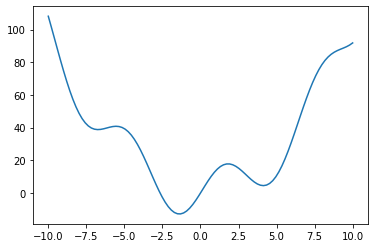

In [11]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [12]:
x0=-5
result = optimize.minimize(f, x0=x0).x

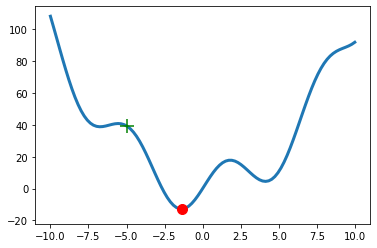

In [13]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

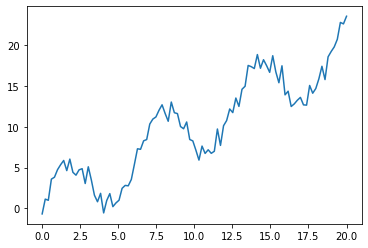

In [17]:
x = np.linspace(0, 20, 100)
y = x + 4 * np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [18]:
from scipy import signal

In [19]:
new_y = signal.detrend(y)

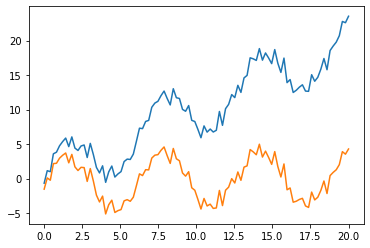

In [20]:
plt.plot(x, y)
plt.plot(x, new_y)

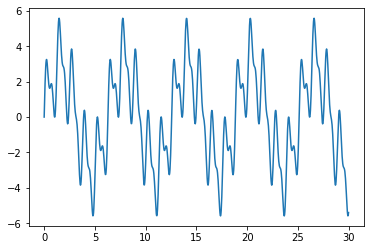

In [21]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [22]:
from scipy import fftpack

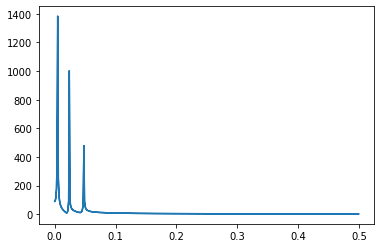

In [25]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

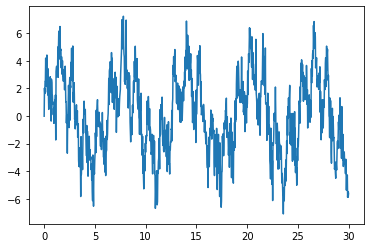

In [31]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)+np.random.randn(1000)
plt.plot(x, y)

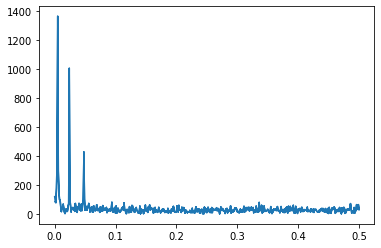

In [32]:
fourier = np.abs(fftpack.fft(y))
frequences = np.abs(fftpack.fftfreq(y.size))
plt.plot(frequences, fourier)

In [33]:
fourier[power<400] = 0

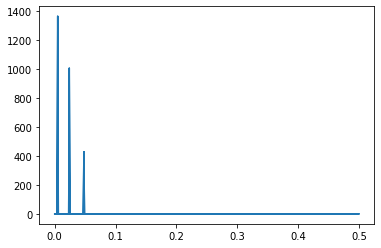

In [34]:
plt.plot(frequences, fourier)

In [35]:
filtered_signal = fftpack.ifft(fourier)

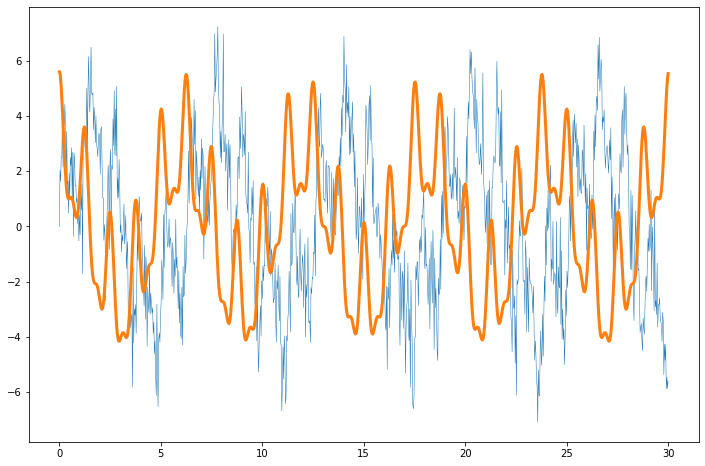

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtered_signal, lw=3)
plt.show()

In [38]:
from scipy import ndimage

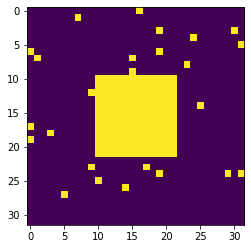

In [39]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10]=1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

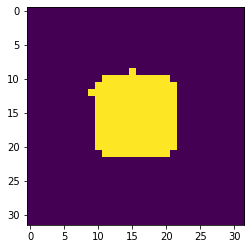

In [41]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(638, 850)

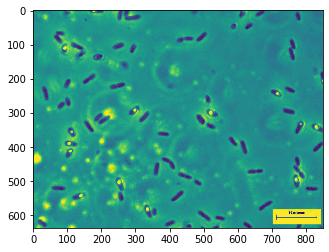

In [43]:
image = plt.imread('bacterie.png')
image = image[:, :, 0]
plt.imshow(image)
image.shape

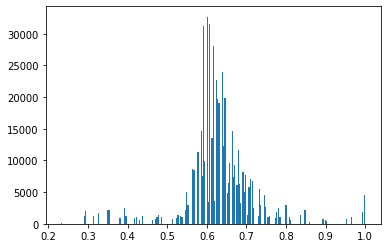

In [46]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [47]:
image = image < 0.5

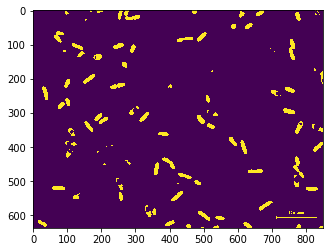

In [48]:
plt.imshow(image)

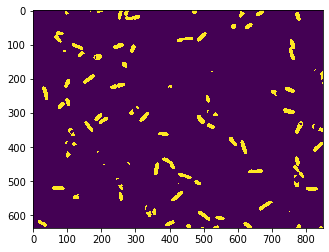

In [49]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [51]:
label_image, n_labels = ndimage.label(open_x)
n_labels

97

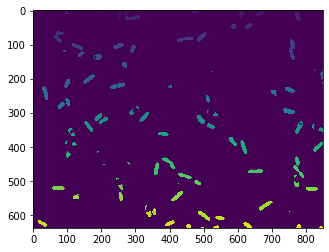

In [53]:
plt.imshow(label_image)

In [54]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

In [55]:
sizes

array([  0.,  20., 130., 283., 186., 156., 300., 198.,  90., 290., 422.,
         5., 274., 191., 506., 400., 471., 759., 339., 361., 286.,  66.,
       202., 305., 201.,   5.,   5.,  18., 159., 436., 278.,  17., 472.,
        72., 464., 335., 205., 210., 242., 278.,  57., 405., 157.,  32.,
       373., 118., 297., 401., 318., 377., 425., 240.,  77., 138., 130.,
       325., 106., 334., 425.,  51., 405., 107., 166.,  16., 301., 486.,
        31., 399.,  28., 376., 449., 405.,  51.,  33., 216., 191.,  15.,
       166., 407., 387., 468., 257., 236., 481.,  52., 192., 466., 209.,
         5., 280., 262., 287., 295., 139., 129.,  98.,  64.])

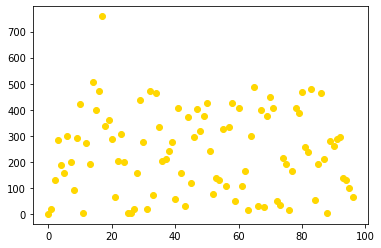

In [56]:
plt.scatter(range(n_labels), sizes, c='gold')